5)  O  coordenador  de  segurança  do  trabalho  de  uma  empresa  quer  pensar  em  maneiras  de 
reduzir os acidentes em sua empresa. Ele então debruça-se sobre os dados dos últimos 3 anos 
a procura de ideias de melhoria.Analise os dados da planilha Green_Belt_FM2S_Lista_Exercícios_01, aba 05.Acidentes e 
responda: 
1. Os acidentes estão estáveis? 
2. Quais tipos são mais frequentes? 
3. Quais afastam por mais tempo? 
4. Quais podemos atuar? 
5. Como poderíamos atuar? 
6. Analise as outras colunas, que dúvidas surgem sobre o processo?


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

In [28]:
url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Green_Belt/2-Measure/Exercicios/Lista_1/base_dados/acidentes.csv'
df = pd.read_csv(url)
df.head()

,REGISTRO,DATA de admissão na empresa,Função,HORAS do A.T,HORAS trabalhadas,Estado civil,Data de nascimento,DATA do acidente,DIA da semana,TIPO de acidente,Tipo de acidente,ÁREA/LOCAL DE trabalho do acidentado,DESCRIÇÃO DO A.T.,DIAS perdidos,NATUREZA LESÃO,AGENTE DA LESÃO,PARTE DO corpo atingida
0,1,22.03.11,Ajud. Montagem,06:35,0,Solteiro,11/11/1992,13/2/2012,SEGUNDA,TRAJETO,NaN,Montagem,"Transitando moto, derrapou e caiu, escoriações...",0,Escoriações,Veiculo,"Torax, braço e perna"
1,2,23.05.88,Lider mecanico,15:00,07:00,Casado,24/2/1967,2/3/2012,SEXTA,ASA,NaN,Manutenção,"Utiliz. alavanca em manut. injetora, escapou a...",0,Contusão,Ferramenta manual,Cabeça
2,3,22.03.11,Mont. III,17:15,0,Casado,12/3/1980,24/3/2012,SEXTA,TRAJETO,NaN,Montagem,"Transitando moto, derrapou e caiu, escoriações...",0,Escoriações,Veiculo,Braço
3,4,23.03.10,Aux. Expedição,10:00,03:00,Solteiro,9/6/1991,17/4/2012,TERÇA,ACA,NaN,Expedição,"Ao descer palete, pisou no solo sentiu dores t...",2,Entorse,Piso,Tornozelo
4,5,27.09.10,Ajud. Montagem,09:00,02:15,Solteiro,16/12/1991,24/4/2012,TERÇA,ACA,NaN,Montagem,Ao acionar rebidadeira deixou 2o dedo direito ...,4,Escoriações,Maquina,Dedos


In [29]:
print(df.head())
print(df.info())
print(df.describe())

   REGISTRO DATA de admissão na empresa          Função HORAS do A.T  \
0         1                    22.03.11  Ajud. Montagem        06:35   
1         2                    23.05.88  Lider mecanico        15:00   
2         3                    22.03.11       Mont. III        17:15   
3         4                    23.03.10  Aux. Expedição        10:00   
4         5                    27.09.10  Ajud. Montagem        09:00   

  HORAS trabalhadas Estado civil Data de nascimento DATA do acidente  \
0                 0     Solteiro         11/11/1992        13/2/2012   
1             07:00       Casado          24/2/1967         2/3/2012   
2                 0       Casado          12/3/1980        24/3/2012   
3             03:00     Solteiro           9/6/1991        17/4/2012   
4             02:15     Solteiro         16/12/1991        24/4/2012   

  DIA da semana TIPO de acidente Tipo de acidente  \
0       SEGUNDA          TRAJETO              NaN   
1         SEXTA             

1. Estabilidade dos Acidentes:


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14440\3939826104.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mensal = self.df.set_index('DATA do acidente').resample('M').size()


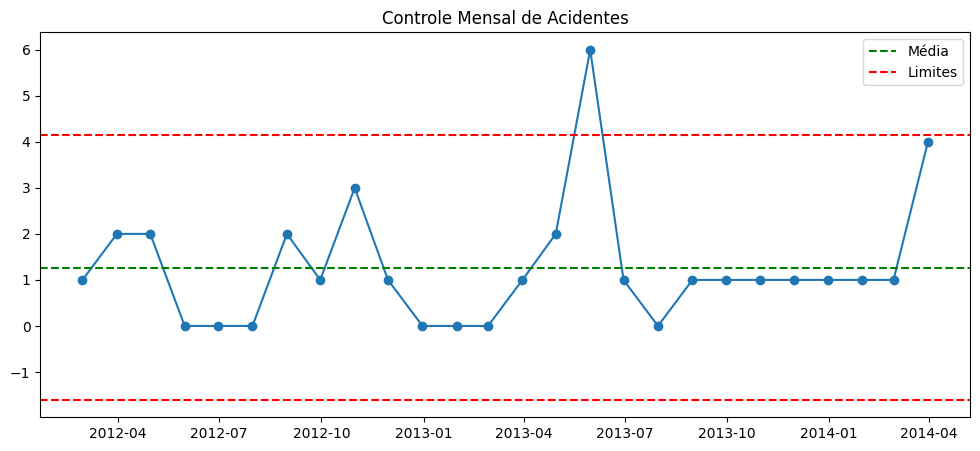

Teste de normalidade - p-valor: 0.000
Os acidentes estão estáveis? Não

2. Tipos Mais Frequentes:


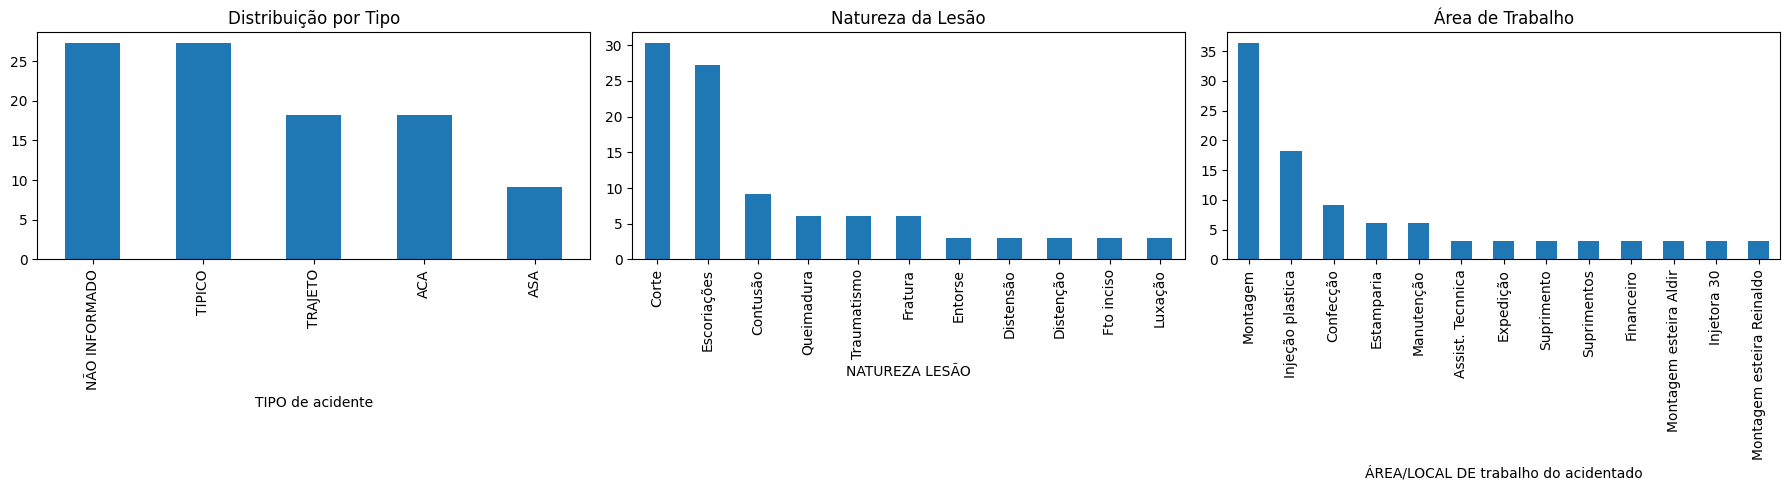


3. Acidentes que Mais Afastam:


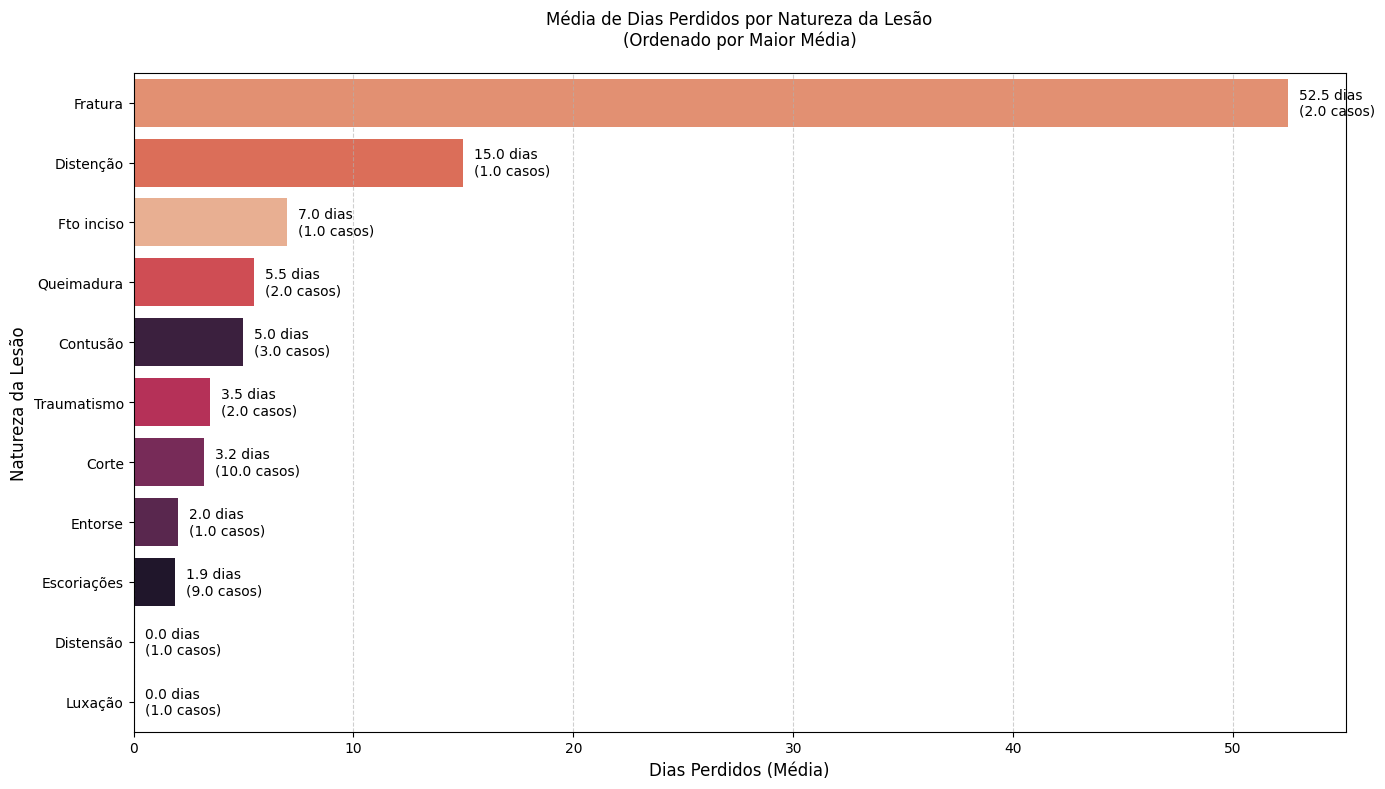

 Média_Dias Ocorrências Total_Dias
NATUREZA LESÃO   
Fratura 52.5 dias 2 ocorrências 105 dias totais
Distenção 15.0 dias 1 ocorrências 15 dias totais
Fto inciso 7.0 dias 1 ocorrências 7 dias totais
Queimadura 5.5 dias 2 ocorrências 11 dias totais
Contusão 5.0 dias 3 ocorrências 15 dias totais
Traumatismo 3.5 dias 2 ocorrências 7 dias totais
Corte 3.2 dias 10 ocorrências 32 dias totais
Entorse 2.0 dias 1 ocorrências 2 dias totais
Escoriações 1.9 dias 9 ocorrências 17 dias totais
Distensão 0.0 dias 1 ocorrências 0 dias totais


4. Oportunidades de Ação:
                                    Ocorrencias  Dias_Perdidos
TIPO de acidente AGENTE DA LESÃO                              
NÃO INFORMADO    Motocicleta                  3             97
ACA              Maquina                      3             11
ASA              Ferramenta manual            3              0
ACA              Ferramenta manual            2             13
NÃO INFORMADO    Estilete                     2              1



In [33]:
class AnaliseAcidentes:
    def __init__(self, df):
        self.df = df.copy()
        self._preprocessar()
        
    def _preprocessar(self):
        """Prepara os dados para análise"""
        # Converter datas
        self.df['DATA do acidente'] = pd.to_datetime(self.df['DATA do acidente'], dayfirst=True)
        self.df['Ano'] = self.df['DATA do acidente'].dt.year
        
        # Função para converter horas
        def converter_hora(hora):
            try:
                if isinstance(hora, str):
                    if ':' in hora:
                        return pd.to_timedelta(hora + ':00').total_seconds()/3600
                    else:  # Se for apenas número (ex: "15")
                        return float(hora)
                elif isinstance(hora, (int, float)):
                    return float(hora)
                return np.nan
            except:
                return np.nan
        
        # Aplicar conversão
        self.df['HORAS do A.T'] = self.df['HORAS do A.T'].apply(converter_hora)
        self.df['HORAS trabalhadas'] = self.df['HORAS trabalhadas'].apply(converter_hora)
        
        # Preencher valores ausentes
        self.df['TIPO de acidente'] = self.df['TIPO de acidente'].fillna('NÃO INFORMADO')
    
    def estabilidade_acidentes(self):
        """Verifica se os acidentes estão estáveis ao longo do tempo"""
        plt.figure(figsize=(12,5))
        
        # Agrupar por mês
        mensal = self.df.set_index('DATA do acidente').resample('M').size()
        
        # Gráfico de controle
        media = mensal.mean()
        mr = np.abs(mensal.diff().dropna())
        amr = mr.mean()
        
        plt.plot(mensal, marker='o')
        plt.axhline(media, color='g', linestyle='--', label='Média')
        plt.axhline(media + 2.66*amr, color='r', linestyle='--', label='Limites')
        plt.axhline(media - 2.66*amr, color='r', linestyle='--')
        plt.title('Controle Mensal de Acidentes')
        plt.legend()
        plt.show()
        
        # Teste de normalidade
        stat, p = stats.shapiro(mensal)
        print(f"Teste de normalidade - p-valor: {p:.3f}")
        print("Os acidentes estão estáveis?" , "Sim" if p > 0.05 else "Não")
    
    def analise_frequencia(self):
        """Identifica padrões de frequência"""
        fig, ax = plt.subplots(1, 3, figsize=(18,5))
        
        # Gráfico 1: Tipo de acidente
        (self.df['TIPO de acidente'].value_counts(normalize=True)*100).plot(
            kind='bar', ax=ax[0], title='Distribuição por Tipo')
        
        # Gráfico 2: Natureza da lesão
        (self.df['NATUREZA LESÃO'].value_counts(normalize=True)*100).plot(
            kind='bar', ax=ax[1], title='Natureza da Lesão')
        
        # Gráfico 3: Área/local
        (self.df['ÁREA/LOCAL DE trabalho do acidentado'].value_counts(normalize=True)*100).plot(
            kind='bar', ax=ax[2], title='Área de Trabalho')
        
        plt.tight_layout()
        plt.show()
    
    def analise_afastamento(self):
        """Análise de dias perdidos com visualização aprimorada"""
        # Calcular estatísticas por natureza da lesão
        afastamento_stats = (self.df.groupby('NATUREZA LESÃO')
                                .agg(Média_Dias=('DIAS perdidos', 'mean'),
                                    Ocorrências=('DIAS perdidos', 'count'),
                                    Total_Dias=('DIAS perdidos', 'sum'))
                                .sort_values('Média_Dias', ascending=False))
        
        # Configurar figura
        plt.figure(figsize=(14, 8))
        
        # Gráfico de barras com seaborn atualizado
        sns.barplot(data=self.df, x='DIAS perdidos', y='NATUREZA LESÃO',
                estimator=np.mean, errorbar=None,  # Substitui o parâmetro ci
                order=afastamento_stats.index,
                palette='rocket',
                hue='NATUREZA LESÃO')
        
        # Adicionar informações no gráfico
        plt.title('Média de Dias Perdidos por Natureza da Lesão\n(Ordenado por Maior Média)', pad=20)
        plt.xlabel('Dias Perdidos (Média)', fontsize=12)
        plt.ylabel('Natureza da Lesão', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        
        # Adicionar anotações com valores
        for i, (idx, row) in enumerate(afastamento_stats.iterrows()):
            plt.text(row['Média_Dias'] + 0.5, i, 
                    f"{row['Média_Dias']:.1f} dias\n({row['Ocorrências']} casos)", 
                    va='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Retornar estatísticas formatadas
        return (afastamento_stats.head(10)
                .style.format({'Média_Dias': '{:.1f} dias',
                            'Ocorrências': '{:.0f} ocorrências',
                            'Total_Dias': '{:.0f} dias totais'})
                .background_gradient(subset=['Média_Dias', 'Total_Dias'], cmap='Reds')
                .set_caption('Top 10 Naturezas de Lesão por Impacto de Afastamento'))
    
    def oportunidades_melhoria(self):
        """Identifica oportunidades prioritárias"""
        ops = self.df.groupby(['TIPO de acidente', 'AGENTE DA LESÃO']).agg(
            Ocorrencias=('REGISTRO', 'count'),
            Dias_Perdidos=('DIAS perdidos', 'sum')
        ).sort_values(['Ocorrencias', 'Dias_Perdidos'], ascending=False)
        
        return ops[~ops.index.get_level_values(1).str.contains('Veiculo', na=False)].head(5)
    
    def sugestoes_acao(self):
        """Gera sugestões baseadas em dados"""
        sugestoes = {
            'ACA': [
                'Treinamento no uso de máquinas',
                'Inspeção periódica de equipamentos',
                'EPIs específicos para operações de risco'
            ],
            'ASA': [
                'Programa de ginástica laboral',
                'Avaliação ergonômica das estações',
                'Sinalização de áreas escorregadias'
            ],
            'TRAJETO': [
                'Campanha de conscientização no trânsito',
                'Parceria com autoescolas para cursos',
                'Verificação obrigatória de equipamentos de segurança'
            ],
            'NÃO INFORMADO': [
                'Padronização do preenchimento dos registros',
                'Treinamento para equipe de SESMT',
                'Auditoria nos registros de acidentes'
            ]
        }
        return sugestoes

# Execução
try:
    analise = AnaliseAcidentes(df)
    
    print("1. Estabilidade dos Acidentes:")
    analise.estabilidade_acidentes()
    
    print("\n2. Tipos Mais Frequentes:")
    analise.analise_frequencia()
    
    print("\n3. Acidentes que Mais Afastam:")
    print(analise.analise_afastamento().to_string())
    
    print("\n4. Oportunidades de Ação:")
    print(analise.oportunidades_melhoria().to_string())
    
    print("\n5. Sugestões de Ação:")
    for tipo, acoes in analise.sugestoes_acao().items():
        print(f"\n{tipo}:")
        for acao in acoes:
            print(f"- {acao}")
            
except Exception as e:
    print(f"Erro durante a análise: {str(e)}")
    print("Verifique os formatos dos dados, especialmente as colunas de hora")